<h1 align="center">ECE 9309 </h1>
<h2 align="center">Course Project -- Plant Disease Sorting </h2>
<h2 align="center">Bryce Dudley,</h2>
<h2 align="center">Nicholas Mitchell,</h2>
<h2 align="center">Bo Shan,</h2>
<h2 align="center">Evan Simpson,</h2>
<h2 align="center">Department of Electrical and Computer Engineering</h2>
<h2 align="center">Western University</h2>
<h2 align="center">Date: No Idea Yet </h2>
<h2 align="center">Submitted to Dr. Shami</h2>

In [1]:
# Do your includes 
# Include libraries that will be needed throughout the project for image processing

# Simple Insight Segmentation and Registration Toolkit
import SimpleITK as sitk

# Maltab plotting 
import matplotlib.pyplot as plt

# array manipulation 
import numpy as np

#Calculating block times 
import timeit

import os

# good for calucating region properties for images (maybe needed later so I haven't deleted it) 
from skimage.measure import label , regionprops
from skimage import data
from skimage.color import rgb2hsv

import pandas as pd

import RemoveBackgroundController as rbc
#check to see if sitk is working 
print(sitk.Version())

SimpleITK Version: 1.2.3 (ITK 4.13)
Compiled: Oct 12 2019 17:33:22



In [2]:
PlantValues = pd.read_csv("../../dataset/PlantVillage/dataset_labels.csv")

In [3]:
[size,y] = PlantValues.shape
PlantValues.head()

Unnamed: 0                                           filename   plant  \
0           0  0022d6b7-d47c-4ee2-ae9a-392a53f48647___JR_B.Sp...  pepper   
1           1  006adb74-934f-448f-a14f-62181742127b___JR_B.Sp...  pepper   
2           2  00f2e69a-1e56-412d-8a79-fdce794a17e4___JR_B.Sp...  pepper   
3           3  01613cd0-d3cd-4e96-945c-a312002037bf___JR_B.Sp...  pepper   
4           4  0169b9ac-07b9-4be1-8b85-da94481f05a4___NREC_B....  pepper   

          disease  
0  bacterial_spot  
1  bacterial_spot  
2  bacterial_spot  
3  bacterial_spot  
4  bacterial_spot

In [4]:
path_to_dataset = "../../dataset/PlantVillage/RGB"

# the real size is 20,639 images. Thats too much for small testing purposes 

#for testing purposes i will make size smaller and multiplier larger to get a better breadth of data 
mult = 1

image_set = {} 
unhealthy_size = 0


# potato First
for i in range(0,size):
        #check to see if the plant is "healthy"
        if((PlantValues.disease[i*mult]== "yellowleaf" )and (PlantValues.plant[i*mult]=="tomato")):
            image_set[unhealthy_size] = rbc.RemoveBackgroundController(PlantValues.filename[i*mult],
                                                     PlantValues.plant[i*mult] + '_' +PlantValues.disease[i*mult],
                                                     path_to_dataset)
            unhealthy_size = unhealthy_size+1
print(unhealthy_size)

3208


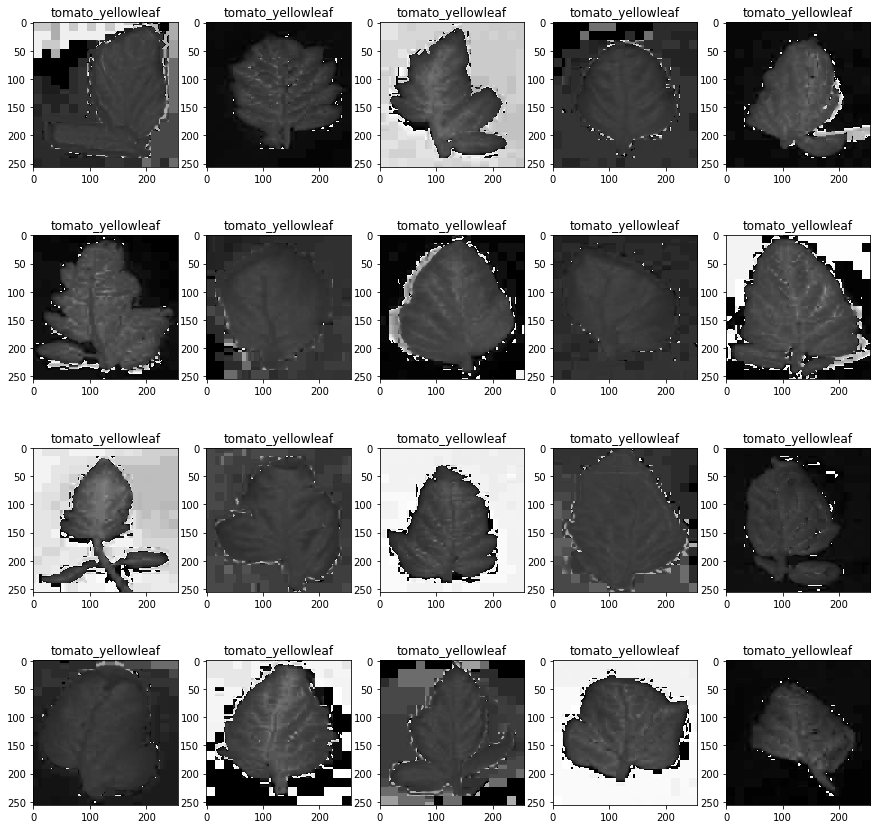

In [5]:
# show the images of removed background 

# Show the images 
plt.subplots(4,5,figsize=(15,15))


# show the first 20 
for i in range (0,20):
    plt.subplot(4,5,i+1)
    #plt.imshow(np.multiply(image_set[i+40].channel[4],image_set[i+40].channel[5]),cmap='gray')
    plt.imshow(image_set[i+40].channel[4],cmap='gray')
    plt.title(image_set[i+40].name)

In [6]:
for i in range(0,unhealthy_size):
    image_set[i].RemoveBackgroundUnhealthyBo3()

D:\Anaconda\lib\site-packages\scipy\cluster\vq.py:579: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  warnings.warn("One of the clusters is empty. "


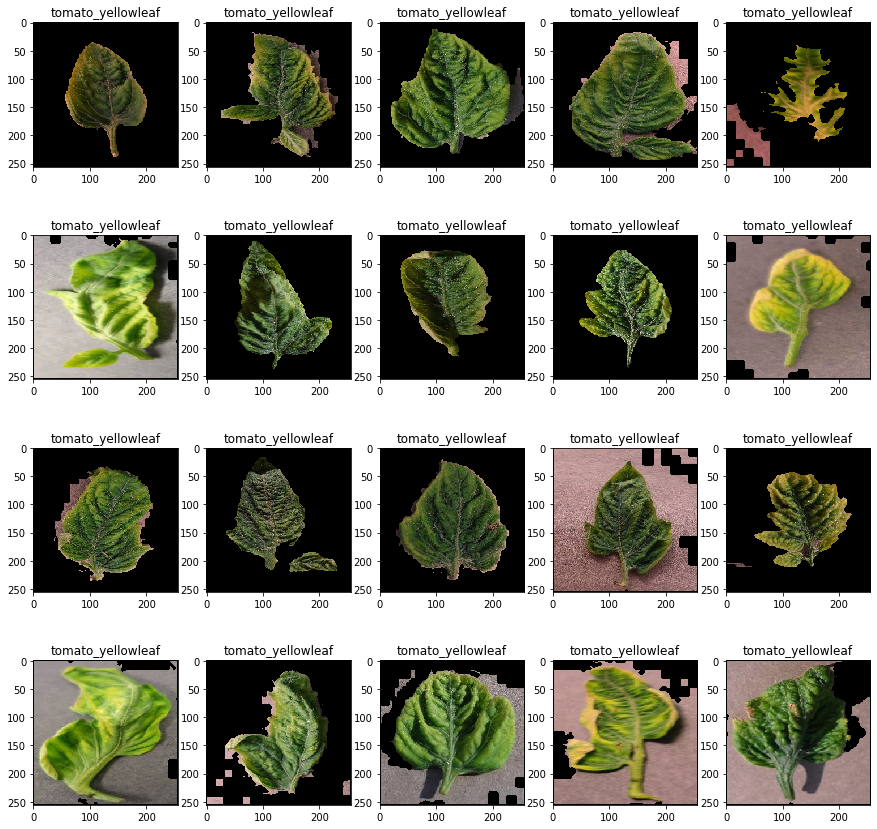

In [7]:
# show the images of removed background 

# Show the images 
plt.subplots(4,5,figsize=(15,15))


# show the first 20 
for i in range (0,20):
    plt.subplot(4,5,i+1)
    #plt.imshow(np.multiply(image_set[i+40].channel[4],image_set[i+40].channel[5]),cmap='gray')
    plt.imshow(image_set[i].final5,cmap='gray')
    plt.title(image_set[i].name)

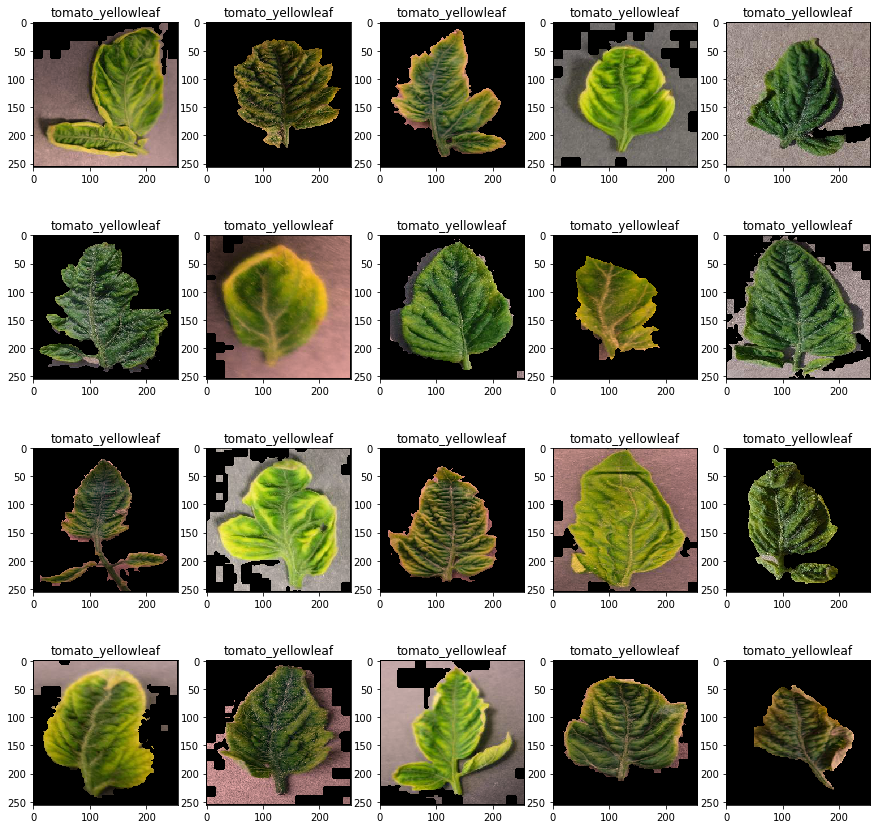

In [8]:
# show the images of removed background 

# Show the images 
plt.subplots(4,5,figsize=(15,15))


# show the first 20 
for i in range (0,20):
    plt.subplot(4,5,i+1)
    #plt.imshow(np.multiply(image_set[i+40].channel[4],image_set[i+40].channel[5]),cmap='gray')
    plt.imshow(image_set[i+40].final5,cmap='gray')
    plt.title(image_set[i+40].name)